In [1]:
from typing import Callable
import doctest

from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

### Test functions

In [2]:
QUINTIC_SOLUTION = 1.1673039782614185

def quintic(x: float) -> float:
    return x ** 5 - x - 1


def quintic_derivative(x: float) -> float:
    return 5 * x ** 4 - 1


def quintic_hess(x: float) -> float:
    return 20 * x ** 3


def quartic(x: float) -> float:
    return x ** 4 + x ** 3 - 4 * x ** 2 + x + 1


def quartic_derivative(x: float) -> float:
    return 4 * x ** 3 + 3 * x ** 2 - 8 * x + 1
    

def quartic_hess(x: float) -> float:
    return 12 * x ** 2 + 6 * x - 8

### Minimisers

In [23]:
LITTLE_PHI = (5 ** 0.5 - 1) / 2


def relative_error(a: float | None, b: float | None):
    if None in (a, b):
        return np.inf
    return abs((b - a) / (b + a))


def newton(f, df, d2f, x0, tol, force_minimum=False):
    """
    >>> newton(quintic, quintic_derivative, quintic_hess, 1.0, tol=1e-16)  #doctest: +ELLIPSIS
    0.6687403...
    >>> newton(quintic, quintic_derivative, quintic_hess, -0.5, tol=1e-16)  #doctest: +ELLIPSIS
    -0.6687403...
    >>> newton(quintic, quintic_derivative, quintic_hess, -0.5, tol=1e-16, force_minimum=True)  #doctest: +ELLIPSIS
    0.6687403...
    """
    ...


def secant(f, df, x0, x1, tol):
    """
    >>> secant(quintic, quintic_derivative, 1.0, 1.1, tol=1e-16)  #doctest: +ELLIPSIS
    0.6687403...
    >>> secant(quintic, quintic_derivative, -1.1, -1.0, tol=1e-16)  #doctest: +ELLIPSIS
    -0.6687403...
    """
    ...


def golden_section(f, a, b, tol):
    """
    >>> golden_section(quintic, -0.5, 1.0, 1e-7)  #doctest: +ELLIPSIS
    0.6687403...
    """
    
    phi=(np.sqrt(5)+1)/2
    

    while abs(a-b)>tol:
        c=b-(b-a)/phi
        d=a+(b-a)/phi
        
        if (f(b)>f(d)>f(c)):
            b=d
        elif (f(a)>f(c)>f(d)):
            a=c
        
        elif (f(c)>f(d)):
            a=c
        else:
            b=d

    return (a+b)/2

def successive_parabolic_interpolation(f, a, b, c, tol):
    """
    >>> successive_parabolic_interpolation(quintic, 0.1, 0.2, 0.3, 1e-16)  #doctest: +ELLIPSIS
    0.6687403...
    >>> successive_parabolic_interpolation(quintic, -0.3, -0.2, -0.1, 1e-16)  #doctest: +ELLIPSIS
    -0.6687402...
    """
    ...


def gradient_descent(f, df, x0, tol, alpha=1.0, c1=0.8, c2=0.9, t=0.5):
    """
    Best use on functions that are bounded from below!
    
    >>> gradient_descent(quartic, quartic_derivative, 0.5, tol=1e-10)  #doctest: +ELLIPSIS
    0.9999999...
    """
    ...


doctest.testmod(verbose=True)

Trying:
    golden_section(quintic, -0.5, 1.0, 1e-7)  #doctest: +ELLIPSIS
Expecting:
    0.6687403...
ok
Trying:
    gradient_descent(quartic, quartic_derivative, 0.5, tol=1e-10)  #doctest: +ELLIPSIS
Expecting:
    0.9999999...
**********************************************************************
File "__main__", line 71, in __main__.gradient_descent
Failed example:
    gradient_descent(quartic, quartic_derivative, 0.5, tol=1e-10)  #doctest: +ELLIPSIS
Expected:
    0.9999999...
Got nothing
Trying:
    newton(quintic, quintic_derivative, quintic_hess, 1.0, tol=1e-16)  #doctest: +ELLIPSIS
Expecting:
    0.6687403...
**********************************************************************
File "__main__", line 12, in __main__.newton
Failed example:
    newton(quintic, quintic_derivative, quintic_hess, 1.0, tol=1e-16)  #doctest: +ELLIPSIS
Expected:
    0.6687403...
Got nothing
Trying:
    newton(quintic, quintic_derivative, quintic_hess, -0.5, tol=1e-16)  #doctest: +ELLIPSIS
Expecting:
    

TestResults(failed=8, attempted=9)

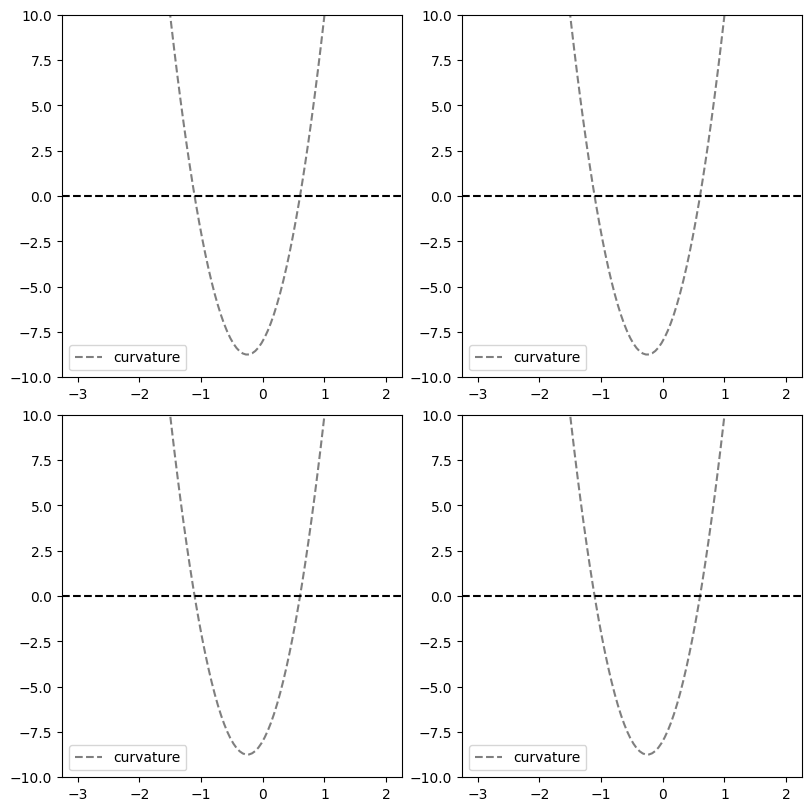

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, constrained_layout=True, figsize=(8, 8))
axes = axes.flatten()

xs = np.linspace(-3, 2, 100)
f = quartic
df = quartic_derivative
d2f = quartic_hess
tol = 1e-8
step = 1e-3

stationary_points = (
    ("left minimum", -1.88278227),
    ("maximum", 0.13278222),
    ("right minimum", 1.0),
)

solutionss = [
#    ("SPI", np.array([successive_parabolic_interpolation(f, x0, x0 + step, x0 + 2*step, tol) for x0 in xs])),
#    ("Newton", np.array([newton(f, df, d2f, x0, tol) for x0 in xs])),
#    ("secant", np.array([secant(f, df, x0, x0 + step, tol) for x0 in xs])),
#    ("gradient descent", np.array([gradient_descent(f, df, x0, tol) for x0 in xs])),
]

for ax, (name, solutions) in zip(axes, solutionss):
    for label, p in stationary_points:
        ys = np.where(np.isclose(solutions, p) , xs, np.nan)
        ax.plot(ys, f(ys), '.-', label=f"converges to {label}") 
        ax.set_title(name)

for ax in axes:
    ax.plot(xs, d2f(xs), 'k--', alpha=0.5, label="curvature")
    ax.axhline(0, color='k', linestyle='--')
    ax.set_ylim(-10, 10)
    ax.legend()
    